In [2]:
import numpy as np
import matplotlib.pyplot as plt

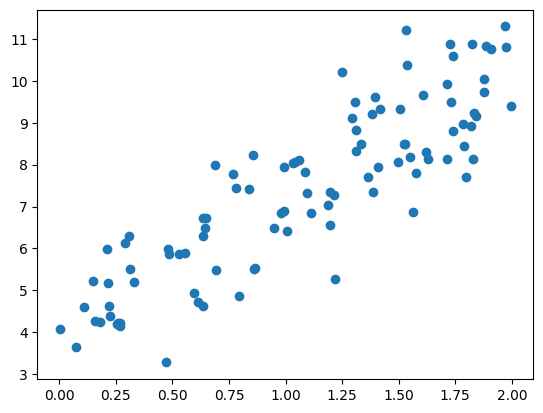

In [3]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
plt.scatter(X,y)

## Gradient descent
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 



In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## Types of gradient Descent
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini Batch Gradient Descent

## Batch Gradient Descent

- Adding a bias term with the input features. The bellow code adds a column of '1' with all training row.
- Initialize weights with zeros

In [17]:
X_b = np.c_[np.ones(X.shape[0]), X]
weights = np.zeros(X_b.shape[1])

In [12]:
weights.shape

(2,)

In [13]:
def predict(X, weights):
    return np.dot(X, weights)

    
def gradient_descent(X, y, weights, learning_rate, iterations):
    # Number of training examples
    m = X.shape[0]
    y = y.reshape(X.shape[0]) # as shape of y is (100,1) but we need shape (100,)
    
    for i in range(iterations):
        predictions = predict(X, weights)
        errors = (predictions - y)
        gradient = (1/m) * np.dot(X.T, errors)
        weights -= (learning_rate * gradient)
        
    return weights
        
        

In [18]:
w = gradient_descent(X_b,y,weights,0.01,10000)
print(w)

[4.0904784  3.05806089]


# Stochastic Gradient Descent

In [26]:
n_epochs = 50
t0, t1 = 5, 50
m = X.shape[0]
def learning_schedule(t):
    return t0/(t + t1)
    
weights = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = xi.T.dot(xi.dot(weights)-yi)
        learning_rate = learning_schedule(epoch*m + i)
        weights -= learning_rate*gradients

print(weights)

[[4.06467558]
 [3.08605447]]
